In [ ]:
#import packages 
import pandas as pd
import io
import numpy as np
from sklearn.impute import SimpleImputer


#search for data file on locald drive
from google.colab import files
uploaded = files.upload()

# Dataset is now stored in a Pandas Dataframe
lyrics = pd.read_csv(io.BytesIO(uploaded['lyr_df.csv']))
triggerwords = pd.read_csv(io.BytesIO(uploaded['song_words_tf_idf.csv']))


Saving lyr_df.csv to lyr_df.csv
Saving song_words_tf_idf.csv to song_words_tf_idf.csv


In [ ]:

#Merge songlyrics and trigger words
lyrictriggerwords = pd.merge(lyrics, triggerwords[["song","genre","word","n","tf","idf","tf_idf"]], on="song")

# Inspect the resultant dataframe
lyrictriggerwords.info()
display(lyrictriggerwords)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28776 entries, 0 to 28775
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song         28776 non-null  object 
 1   artist       28776 non-null  object 
 2   hip_hop_rnb  27359 non-null  float64
 3   lyrics       28776 non-null  object 
 4   genre        28776 non-null  object 
 5   word         28776 non-null  object 
 6   n            28776 non-null  int64  
 7   tf           28776 non-null  float64
 8   idf          28776 non-null  float64
 9   tf_idf       28776 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


,song,artist,hip_hop_rnb,lyrics,genre,word,n,tf,idf,tf_idf
0,Beautiful Crazy,Luke Combs,0.0,Her day starts with a coffee and ends with a w...,Rock / Country,crazy,8,0.103896,2.728669,0.283498
1,Beautiful Crazy,Luke Combs,0.0,Her day starts with a coffee and ends with a w...,Rock / Country,beautiful,7,0.090909,3.361192,0.305563
2,Beautiful Crazy,Luke Combs,0.0,Her day starts with a coffee and ends with a w...,Rock / Country,crazy's,4,0.051948,6.194405,0.321787
3,Beautiful Crazy,Luke Combs,0.0,Her day starts with a coffee and ends with a w...,Rock / Country,yeah,4,0.051948,0.588603,0.030577
4,Beautiful Crazy,Luke Combs,0.0,Her day starts with a coffee and ends with a w...,Rock / Country,afraid,3,0.038961,2.898569,0.112931
...,...,...,...,...,...,...,...,...,...,...
28771,You Remind Me of Something,R. Kelly,1.0,You remind me of something I just can't think ...,RnB / Hip Hop,real,1,0.005650,1.917739,0.010835
28772,You Remind Me of Something,R. Kelly,1.0,You remind me of something I just can't think ...,RnB / Hip Hop,satisfaction,1,0.005650,4.808111,0.027164
28773,You Remind Me of Something,R. Kelly,1.0,You remind me of something I just can't think ...,RnB / Hip Hop,style,1,0.005650,3.629456,0.020505
28774,You Remind Me of Something,R. Kelly,1.0,You remind me of something I just can't think ...,RnB / Hip Hop,system,1,0.005650,4.808111,0.027164


In [ ]:
# Create a correlation matrix
corr_metrics = lyrictriggerwords.corr()
corr_metrics.style.background_gradient()

,hip_hop_rnb,n,tf,idf,tf_idf
hip_hop_rnb,1.000000,0.053105,-0.151617,-0.008976,-0.194390
n,0.053105,1.000000,0.763475,-0.137976,0.625481
tf,-0.151617,0.763475,1.000000,-0.197606,0.820624
idf,-0.008976,-0.137976,-0.197606,1.000000,0.118419
tf_idf,-0.194390,0.625481,0.820624,0.118419,1.000000


In [ ]:
# Define our features 
feature = lyrictriggerwords.drop(["hip_hop_rnb","song","artist","lyrics","genre","word","n"], axis=1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(feature)
SimpleImputer()
features = imp.transform(feature)

# Define our labels
labels = lyrictriggerwords["genre"]

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)



[0.60819069 0.35102337 0.04078594]
3


Text(0.5, 0, 'Principal Component #')

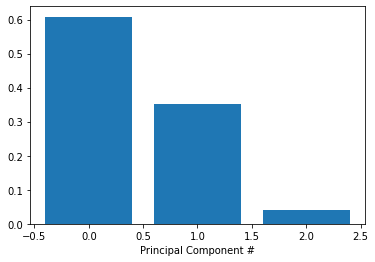

In [ ]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)
print(pca.n_components_)

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(3), exp_variance)
ax.set_xlabel('Principal Component #')

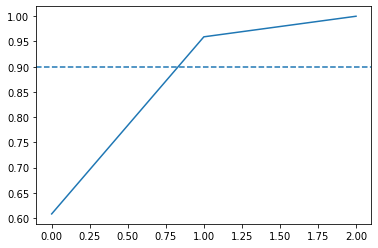

In [ ]:


# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(3), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 3

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [ ]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
                 precision    recall  f1-score   support

 RnB / Hip Hop       0.80      0.81      0.81      4721
Rock / Country       0.64      0.62      0.63      2473

      accuracy                           0.75      7194
     macro avg       0.72      0.72      0.72      7194
  weighted avg       0.75      0.75      0.75      7194

Logistic Regression: 
                 precision    recall  f1-score   support

 RnB / Hip Hop       0.67      0.95      0.79      4721
Rock / Country       0.55      0.11      0.18      2473

      accuracy                           0.66      7194
     macro avg       0.61      0.53      0.48      7194
  weighted avg       0.63      0.66      0.58      7194



In [ ]:
# Subset only the hip-hop tracks, and then only the rock tracks
#hop_only has more data entries than rock so we must make the sample sizes equal by letting ".sample(len(rock_only)"
hop_only = lyrictriggerwords.loc[lyrictriggerwords["genre"] == "RnB / Hip Hop"].sample(len(rock_only))

rock_only = lyrictriggerwords.loc[lyrictriggerwords["genre"] == "Rock / Country"]#.sample(len(hop_only), random_state=8970)

# concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat([rock_only, hop_only])

feature2 = rock_hop_bal.drop(["hip_hop_rnb","song","artist","lyrics","genre","word","n"], axis=1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(feature2)
SimpleImputer()
features2 = imp.transform(feature2)

# Define our labels
labels2 = rock_hop_bal['genre']

pca_projection = pca.fit_transform(scaler.fit_transform(features2))


# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels2, random_state=10)

In [ ]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
                 precision    recall  f1-score   support

 RnB / Hip Hop       0.74      0.74      0.74      2502
Rock / Country       0.74      0.74      0.74      2450

      accuracy                           0.74      4952
     macro avg       0.74      0.74      0.74      4952
  weighted avg       0.74      0.74      0.74      4952

Logistic Regression: 
                 precision    recall  f1-score   support

 RnB / Hip Hop       0.60      0.83      0.70      2502
Rock / Country       0.72      0.44      0.54      2450

      accuracy                           0.64      4952
     macro avg       0.66      0.63      0.62      4952
  weighted avg       0.66      0.64      0.62      4952



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels2, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels2, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.6678899545683998 Logistic Regression: 0.4103618211392063
